# project



# **Linear Regression Model for NEW YORK TAXI TRIP DURATION** 

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dvinay-19-cse/project


'https://jovian.ai/dvinay-19-cse/project'

In [5]:
!pip install scikit-learn --upgrade --quiet

In [6]:
!pip install opendatasets --upgrade --quiet

In [7]:
import opendatasets as od

In [8]:
od.version()

'0.1.20'

 Downloading the Data

To begin, let's download the data using the `urlretrieve` function from `urllib.request`.

In [9]:
dataset_url = 'https://www.kaggle.com/c/nyc-taxi-trip-duration?rvi=1'

In [10]:
od.download(dataset_url)

Skipping, found downloaded files in "./nyc-taxi-trip-duration" (use force=True to force download)


In [11]:
import os

In [12]:
data_dir = './nyc-taxi-trip-duration'

# *new york taxi trip duration*

In [13]:
os.listdir(data_dir)

['sample_submission.zip', 'train.zip', 'test.zip']

In [14]:
train_csv = data_dir + '/train.zip'

We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [15]:
!pip install pandas --quiet

In [16]:
import pandas as pd

In [17]:
train_df = pd.read_csv(train_csv)

In [18]:
train_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


# Preparation of data sets 
Training , Validation , Test

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
from sklearn.model_selection import train_test_split

# here the compilation stops because of more data.
# so, I reduced the size of train val test data sets  

In [20]:
train2_df,test1_df = train_test_split(train_df, test_size=0.85, random_state=42)

In [21]:
train1_df,test3_df = train_test_split(train2_df, test_size=0.85, random_state=42)

# training set

In [22]:
train1_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1416597,id0448806,1,2016-06-19 00:00:10,2016-06-19 00:08:56,2,-73.993767,40.727394,-74.002014,40.733707,N,526
614975,id2849007,2,2016-06-09 20:51:28,2016-06-09 21:15:15,1,-73.994324,40.720341,-73.982857,40.762112,N,1427
526363,id1084158,2,2016-01-22 15:45:11,2016-01-22 15:52:51,1,-73.980469,40.754398,-73.979797,40.743183,N,460
803286,id0743925,1,2016-06-10 01:15:29,2016-06-10 01:18:04,1,-74.001778,40.739334,-74.005386,40.739910,N,155
325284,id2719165,1,2016-03-17 17:32:51,2016-03-17 17:43:16,1,-73.975433,40.755455,-73.957161,40.774624,N,625
...,...,...,...,...,...,...,...,...,...,...,...
1014659,id0452471,2,2016-02-14 18:13:37,2016-02-14 18:24:24,1,-73.998451,40.734711,-74.000153,40.722851,N,647
828837,id0873264,2,2016-05-15 10:47:32,2016-05-15 10:51:06,3,-74.004021,40.729778,-74.011276,40.729462,N,214
162154,id2738118,2,2016-03-31 19:13:22,2016-03-31 19:23:17,1,-73.974129,40.753830,-73.985718,40.746281,N,595
331110,id3316664,2,2016-04-29 20:53:57,2016-04-29 21:03:18,1,-73.988831,40.736790,-73.973480,40.738071,N,561


test data set is very huge so we only used a part of it 
as validation set and test set

In [23]:
val_df,test2_df = train_test_split(test1_df, test_size=0.85, random_state=42)

# Validation set

In [24]:
val_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1343425,id0511668,1,2016-02-13 18:21:45,2016-02-13 18:45:37,1,-73.968391,40.799702,-73.988457,40.768990,N,1432
748941,id3312063,1,2016-06-21 11:28:08,2016-06-21 11:41:34,1,-73.986938,40.755016,-73.972176,40.745457,N,806
32893,id1179786,2,2016-06-17 06:24:54,2016-06-17 06:27:35,4,-73.988190,40.755329,-73.988083,40.749149,N,161
301363,id0356168,1,2016-05-26 19:48:29,2016-05-26 19:51:04,1,-73.988594,40.746525,-73.991066,40.739643,N,155
631276,id2005947,2,2016-05-28 23:22:06,2016-05-28 23:23:24,1,-73.955551,40.763870,-73.958290,40.760780,N,78
...,...,...,...,...,...,...,...,...,...,...,...
905266,id3922590,1,2016-02-18 08:01:18,2016-02-18 08:13:14,1,-73.982552,40.782341,-73.964081,40.799835,N,716
495059,id3587124,2,2016-05-02 19:44:59,2016-05-02 19:51:04,1,-73.992363,40.749104,-73.977966,40.745850,N,365
112796,id2241694,2,2016-01-27 13:30:39,2016-01-27 13:45:42,1,-73.982185,40.770573,-73.957726,40.782406,N,903
53067,id0819012,1,2016-01-22 15:03:44,2016-01-22 15:12:42,1,-73.999321,40.734207,-73.989693,40.725975,N,538


In [25]:
test_df,waste_df = train_test_split(test2_df, test_size=0.80, random_state=42)

# Test set 

In [26]:
test_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
398134,id2002199,2,2016-02-08 17:01:47,2016-02-08 17:05:14,1,-73.963287,40.798618,-73.969406,40.798237,N,207
1058255,id3123720,2,2016-01-07 14:07:40,2016-01-07 14:12:18,1,-73.994080,40.751240,-73.997772,40.760540,N,278
1201558,id3023710,2,2016-04-30 02:09:32,2016-04-30 02:28:50,6,-73.992775,40.748486,-73.997673,40.718056,N,1158
33027,id2235436,2,2016-05-06 07:45:35,2016-05-06 07:59:31,5,-73.976097,40.740082,-73.991669,40.749882,N,836
581921,id1030222,1,2016-02-27 15:07:39,2016-02-27 15:30:58,2,-73.960449,40.781429,-73.987808,40.745373,N,1399
...,...,...,...,...,...,...,...,...,...,...,...
1271609,id0551010,1,2016-03-18 02:55:42,2016-03-18 03:23:47,1,-73.991280,40.685467,-73.966316,40.797279,N,1685
367645,id0572338,2,2016-02-04 17:10:27,2016-02-04 17:18:40,1,-73.965958,40.764648,-73.957787,40.779419,N,493
213680,id1013128,1,2016-01-01 21:45:05,2016-01-01 22:00:51,2,-73.984863,40.737022,-73.981499,40.763035,N,946
937537,id1518346,2,2016-06-22 08:38:19,2016-06-22 08:52:26,2,-73.990410,40.732971,-73.975571,40.755779,N,847


In [27]:
train1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32819 entries, 1416597 to 562214
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  32819 non-null  object 
 1   vendor_id           32819 non-null  int64  
 2   pickup_datetime     32819 non-null  object 
 3   dropoff_datetime    32819 non-null  object 
 4   passenger_count     32819 non-null  int64  
 5   pickup_longitude    32819 non-null  float64
 6   pickup_latitude     32819 non-null  float64
 7   dropoff_longitude   32819 non-null  float64
 8   dropoff_latitude    32819 non-null  float64
 9   store_and_fwd_flag  32819 non-null  object 
 10  trip_duration       32819 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 3.0+ MB


 the date column is very important for us to find out the 
 difference for trip duration on weekends and weekdays 

 we can even further finad the trip duration based on months 




lets divide the date column into hour week month 

In [28]:
train1_df['pickup_datetime'] = pd.to_datetime(train1_df['pickup_datetime'])

train1_df['pickup_hour'] = [d.hour for d in train1_df['pickup_datetime']]
train1_df['pickup_week'] = [d.week for d in train1_df['pickup_datetime']]
train1_df['pickup_month'] = [d.month for d in train1_df['pickup_datetime']]
train1_df['pickup_weekdays'] = [d.weekday() for d in train1_df['pickup_datetime']]
train1_df['pickup_weekend'] = ["Not-weekend" for d in train1_df['pickup_datetime']]
train1_df.loc[train1_df['pickup_weekdays'].isin([5, 6]), 'pickup_weekend'] = "Weekend"

train1_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend
1416597,id0448806,1,2016-06-19 00:00:10,2016-06-19 00:08:56,2,-73.993767,40.727394,-74.002014,40.733707,N,526,0,24,6,6,Weekend
614975,id2849007,2,2016-06-09 20:51:28,2016-06-09 21:15:15,1,-73.994324,40.720341,-73.982857,40.762112,N,1427,20,23,6,3,Not-weekend
526363,id1084158,2,2016-01-22 15:45:11,2016-01-22 15:52:51,1,-73.980469,40.754398,-73.979797,40.743183,N,460,15,3,1,4,Not-weekend
803286,id0743925,1,2016-06-10 01:15:29,2016-06-10 01:18:04,1,-74.001778,40.739334,-74.005386,40.739910,N,155,1,23,6,4,Not-weekend
325284,id2719165,1,2016-03-17 17:32:51,2016-03-17 17:43:16,1,-73.975433,40.755455,-73.957161,40.774624,N,625,17,11,3,3,Not-weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014659,id0452471,2,2016-02-14 18:13:37,2016-02-14 18:24:24,1,-73.998451,40.734711,-74.000153,40.722851,N,647,18,6,2,6,Weekend
828837,id0873264,2,2016-05-15 10:47:32,2016-05-15 10:51:06,3,-74.004021,40.729778,-74.011276,40.729462,N,214,10,19,5,6,Weekend
162154,id2738118,2,2016-03-31 19:13:22,2016-03-31 19:23:17,1,-73.974129,40.753830,-73.985718,40.746281,N,595,19,13,3,3,Not-weekend
331110,id3316664,2,2016-04-29 20:53:57,2016-04-29 21:03:18,1,-73.988831,40.736790,-73.973480,40.738071,N,561,20,17,4,4,Not-weekend


In [29]:
val_df['pickup_datetime'] = pd.to_datetime(val_df['pickup_datetime'])

val_df['pickup_hour'] = [d.hour for d in val_df['pickup_datetime']]
val_df['pickup_week'] = [d.week for d in val_df['pickup_datetime']]
val_df['pickup_month'] = [d.month for d in val_df['pickup_datetime']]
val_df['pickup_weekdays'] = [d.weekday() for d in val_df['pickup_datetime']]
val_df['pickup_weekend'] = ["Not-weekend" for d in val_df['pickup_datetime']]
val_df.loc[val_df['pickup_weekdays'].isin([5, 6]), 'pickup_weekend'] = "Weekend"

val_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend
1343425,id0511668,1,2016-02-13 18:21:45,2016-02-13 18:45:37,1,-73.968391,40.799702,-73.988457,40.768990,N,1432,18,6,2,5,Weekend
748941,id3312063,1,2016-06-21 11:28:08,2016-06-21 11:41:34,1,-73.986938,40.755016,-73.972176,40.745457,N,806,11,25,6,1,Not-weekend
32893,id1179786,2,2016-06-17 06:24:54,2016-06-17 06:27:35,4,-73.988190,40.755329,-73.988083,40.749149,N,161,6,24,6,4,Not-weekend
301363,id0356168,1,2016-05-26 19:48:29,2016-05-26 19:51:04,1,-73.988594,40.746525,-73.991066,40.739643,N,155,19,21,5,3,Not-weekend
631276,id2005947,2,2016-05-28 23:22:06,2016-05-28 23:23:24,1,-73.955551,40.763870,-73.958290,40.760780,N,78,23,21,5,5,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905266,id3922590,1,2016-02-18 08:01:18,2016-02-18 08:13:14,1,-73.982552,40.782341,-73.964081,40.799835,N,716,8,7,2,3,Not-weekend
495059,id3587124,2,2016-05-02 19:44:59,2016-05-02 19:51:04,1,-73.992363,40.749104,-73.977966,40.745850,N,365,19,18,5,0,Not-weekend
112796,id2241694,2,2016-01-27 13:30:39,2016-01-27 13:45:42,1,-73.982185,40.770573,-73.957726,40.782406,N,903,13,4,1,2,Not-weekend
53067,id0819012,1,2016-01-22 15:03:44,2016-01-22 15:12:42,1,-73.999321,40.734207,-73.989693,40.725975,N,538,15,3,1,4,Not-weekend


In [30]:
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])

test_df['pickup_hour'] = [d.hour for d in test_df['pickup_datetime']]
test_df['pickup_week'] = [d.week for d in test_df['pickup_datetime']]
test_df['pickup_month'] = [d.month for d in test_df['pickup_datetime']]
test_df['pickup_weekdays'] = [d.weekday() for d in test_df['pickup_datetime']]
test_df['pickup_weekend'] = ["Not-weekend" for d in test_df['pickup_datetime']]
test_df.loc[test_df['pickup_weekdays'].isin([5, 6]), 'pickup_weekend'] = "Weekend"

test_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend
398134,id2002199,2,2016-02-08 17:01:47,2016-02-08 17:05:14,1,-73.963287,40.798618,-73.969406,40.798237,N,207,17,6,2,0,Not-weekend
1058255,id3123720,2,2016-01-07 14:07:40,2016-01-07 14:12:18,1,-73.994080,40.751240,-73.997772,40.760540,N,278,14,1,1,3,Not-weekend
1201558,id3023710,2,2016-04-30 02:09:32,2016-04-30 02:28:50,6,-73.992775,40.748486,-73.997673,40.718056,N,1158,2,17,4,5,Weekend
33027,id2235436,2,2016-05-06 07:45:35,2016-05-06 07:59:31,5,-73.976097,40.740082,-73.991669,40.749882,N,836,7,18,5,4,Not-weekend
581921,id1030222,1,2016-02-27 15:07:39,2016-02-27 15:30:58,2,-73.960449,40.781429,-73.987808,40.745373,N,1399,15,8,2,5,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271609,id0551010,1,2016-03-18 02:55:42,2016-03-18 03:23:47,1,-73.991280,40.685467,-73.966316,40.797279,N,1685,2,11,3,4,Not-weekend
367645,id0572338,2,2016-02-04 17:10:27,2016-02-04 17:18:40,1,-73.965958,40.764648,-73.957787,40.779419,N,493,17,5,2,3,Not-weekend
213680,id1013128,1,2016-01-01 21:45:05,2016-01-01 22:00:51,2,-73.984863,40.737022,-73.981499,40.763035,N,946,21,53,1,4,Not-weekend
937537,id1518346,2,2016-06-22 08:38:19,2016-06-22 08:52:26,2,-73.990410,40.732971,-73.975571,40.755779,N,847,8,25,6,2,Not-weekend


this data is usefull to understand the traffic in newyork at different hours weekends and months 
because traffic plays vital role in estimating the trip duration

Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [31]:
input_cols = ['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_hour',
 'pickup_week',
 'pickup_month',
 'pickup_weekdays',
 'pickup_weekend']
target_col = 'trip_duration'

In [32]:
input_cols

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'pickup_hour',
 'pickup_week',
 'pickup_month',
 'pickup_weekdays',
 'pickup_weekend']

In [33]:
target_col

'trip_duration'

In [34]:
train1_inputs = train1_df[input_cols].copy()
train1_targets = train1_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [35]:
train1_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend
1416597,1,2,-73.993767,40.727394,-74.002014,40.733707,N,0,24,6,6,Weekend
614975,2,1,-73.994324,40.720341,-73.982857,40.762112,N,20,23,6,3,Not-weekend
526363,2,1,-73.980469,40.754398,-73.979797,40.743183,N,15,3,1,4,Not-weekend
803286,1,1,-74.001778,40.739334,-74.005386,40.739910,N,1,23,6,4,Not-weekend
325284,1,1,-73.975433,40.755455,-73.957161,40.774624,N,17,11,3,3,Not-weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
1014659,2,1,-73.998451,40.734711,-74.000153,40.722851,N,18,6,2,6,Weekend
828837,2,3,-74.004021,40.729778,-74.011276,40.729462,N,10,19,5,6,Weekend
162154,2,1,-73.974129,40.753830,-73.985718,40.746281,N,19,13,3,3,Not-weekend
331110,2,1,-73.988831,40.736790,-73.973480,40.738071,N,20,17,4,4,Not-weekend


In [36]:
train1_targets

1416597     526
614975     1427
526363      460
803286      155
325284      625
           ... 
1014659     647
828837      214
162154      595
331110      561
562214      303
Name: trip_duration, Length: 32819, dtype: int64

In [37]:
val_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend
1343425,1,1,-73.968391,40.799702,-73.988457,40.768990,N,18,6,2,5,Weekend
748941,1,1,-73.986938,40.755016,-73.972176,40.745457,N,11,25,6,1,Not-weekend
32893,2,4,-73.988190,40.755329,-73.988083,40.749149,N,6,24,6,4,Not-weekend
301363,1,1,-73.988594,40.746525,-73.991066,40.739643,N,19,21,5,3,Not-weekend
631276,2,1,-73.955551,40.763870,-73.958290,40.760780,N,23,21,5,5,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
905266,1,1,-73.982552,40.782341,-73.964081,40.799835,N,8,7,2,3,Not-weekend
495059,2,1,-73.992363,40.749104,-73.977966,40.745850,N,19,18,5,0,Not-weekend
112796,2,1,-73.982185,40.770573,-73.957726,40.782406,N,13,4,1,2,Not-weekend
53067,1,1,-73.999321,40.734207,-73.989693,40.725975,N,15,3,1,4,Not-weekend


In [38]:
val_targets

1343425    1432
748941      806
32893       161
301363      155
631276       78
           ... 
905266      716
495059      365
112796      903
53067       538
1318674     537
Name: trip_duration, Length: 185977, dtype: int64

In [39]:
test_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend
398134,2,1,-73.963287,40.798618,-73.969406,40.798237,N,17,6,2,0,Not-weekend
1058255,2,1,-73.994080,40.751240,-73.997772,40.760540,N,14,1,1,3,Not-weekend
1201558,2,6,-73.992775,40.748486,-73.997673,40.718056,N,2,17,4,5,Weekend
33027,2,5,-73.976097,40.740082,-73.991669,40.749882,N,7,18,5,4,Not-weekend
581921,1,2,-73.960449,40.781429,-73.987808,40.745373,N,15,8,2,5,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
1271609,1,1,-73.991280,40.685467,-73.966316,40.797279,N,2,11,3,4,Not-weekend
367645,2,1,-73.965958,40.764648,-73.957787,40.779419,N,17,5,2,3,Not-weekend
213680,1,2,-73.984863,40.737022,-73.981499,40.763035,N,21,53,1,4,Not-weekend
937537,2,2,-73.990410,40.732971,-73.975571,40.755779,N,8,25,6,2,Not-weekend


In [40]:
test_targets

398134      207
1058255     278
1201558    1158
33027       836
581921     1399
           ... 
1271609    1685
367645      493
213680      946
937537      847
206921      565
Name: trip_duration, Length: 210774, dtype: int64

In [41]:
import numpy as np

 segregating numerical and categorical columns 

In [42]:
numeric_cols = train1_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train1_inputs.select_dtypes('object').columns.tolist()

In [43]:
print(numeric_cols)

['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_hour', 'pickup_week', 'pickup_month', 'pickup_weekdays']


In [44]:
print(categorical_cols)

['store_and_fwd_flag', 'pickup_weekend']


 Simple Imputer

Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
imputer = SimpleImputer(strategy = 'mean').fit(train1_df[numeric_cols])

In [47]:
train1_inputs[numeric_cols] = imputer.transform(train1_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

In [48]:
test_inputs[numeric_cols].isna().sum()

vendor_id            0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
pickup_hour          0
pickup_week          0
pickup_month         0
pickup_weekdays      0
dtype: int64

In [49]:
val_inputs[numeric_cols].isna().sum()

vendor_id            0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
pickup_hour          0
pickup_week          0
pickup_month         0
pickup_weekdays      0
dtype: int64

 MinMaxScaler

 Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler().fit(train1_df[numeric_cols])

In [52]:
train1_inputs[numeric_cols] = scaler.transform(train1_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [53]:
train1_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend
1416597,0.0,0.2,0.341346,0.234997,0.380605,0.279552,N,0.000000,0.442308,1.0,1.000000,Weekend
614975,1.0,0.0,0.340808,0.223844,0.397803,0.322412,N,0.869565,0.423077,1.0,0.500000,Not-weekend
526363,1.0,0.0,0.354194,0.277701,0.400549,0.293850,N,0.652174,0.038462,0.0,0.666667,Not-weekend
803286,0.0,0.0,0.333606,0.253879,0.377578,0.288911,N,0.043478,0.423077,1.0,0.666667,Not-weekend
325284,0.0,0.0,0.359059,0.279372,0.420870,0.341292,N,0.739130,0.192308,0.4,0.500000,Not-weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
1014659,1.0,0.0,0.336820,0.246568,0.382276,0.263170,N,0.782609,0.096154,0.2,1.000000,Weekend
828837,1.0,0.4,0.331439,0.238768,0.372290,0.273145,N,0.434783,0.346154,0.8,1.000000,Weekend
162154,1.0,0.0,0.360319,0.276802,0.395234,0.298524,N,0.826087,0.230769,0.4,0.500000,Not-weekend
331110,1.0,0.0,0.346115,0.249855,0.406220,0.286137,N,0.869565,0.307692,0.6,0.666667,Not-weekend


In [54]:
val_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend
1343425,0.0,0.0,0.365862,0.349341,0.392776,0.332790,N,0.782609,0.096154,0.2,0.833333,Weekend
748941,0.0,0.0,0.347943,0.278678,0.407391,0.297281,N,0.478261,0.461538,1.0,0.166667,Not-weekend
32893,1.0,0.6,0.346734,0.279173,0.393111,0.302853,N,0.260870,0.442308,1.0,0.666667,Not-weekend
301363,0.0,0.0,0.346344,0.265250,0.390433,0.288508,N,0.826087,0.384615,0.8,0.500000,Not-weekend
631276,1.0,0.0,0.378268,0.292679,0.419857,0.320403,N,1.000000,0.384615,0.8,0.833333,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...
905266,0.0,0.0,0.352182,0.321888,0.414658,0.379334,N,0.347826,0.115385,0.2,0.500000,Not-weekend
495059,1.0,0.0,0.342702,0.269328,0.402193,0.297874,N,0.826087,0.326923,0.8,0.000000,Not-weekend
112796,1.0,0.0,0.352535,0.303278,0.420363,0.353035,N,0.565217,0.057692,0.0,0.333333,Not-weekend
53067,0.0,0.0,0.335980,0.245771,0.391666,0.267884,N,0.652174,0.038462,0.0,0.666667,Not-weekend


In [55]:
val_targets

1343425    1432
748941      806
32893       161
301363      155
631276       78
           ... 
905266      716
495059      365
112796      903
53067       538
1318674     537
Name: trip_duration, Length: 185977, dtype: int64

In [56]:
train1_inputs.describe().loc[['min', 'max']]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,pickup_week,pickup_month,pickup_weekdays
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


 one hot encoder

 One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train1_df[categorical_cols])

In [59]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [60]:
train1_inputs[encoded_cols] = encoder.transform(train1_inputs[categorical_cols])

test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [61]:
train1_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekend_Not-weekend,pickup_weekend_Weekend
1416597,0.0,0.2,0.341346,0.234997,0.380605,0.279552,N,0.000000,0.442308,1.0,1.000000,Weekend,1.0,0.0,0.0,1.0
614975,1.0,0.0,0.340808,0.223844,0.397803,0.322412,N,0.869565,0.423077,1.0,0.500000,Not-weekend,1.0,0.0,1.0,0.0
526363,1.0,0.0,0.354194,0.277701,0.400549,0.293850,N,0.652174,0.038462,0.0,0.666667,Not-weekend,1.0,0.0,1.0,0.0
803286,0.0,0.0,0.333606,0.253879,0.377578,0.288911,N,0.043478,0.423077,1.0,0.666667,Not-weekend,1.0,0.0,1.0,0.0
325284,0.0,0.0,0.359059,0.279372,0.420870,0.341292,N,0.739130,0.192308,0.4,0.500000,Not-weekend,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014659,1.0,0.0,0.336820,0.246568,0.382276,0.263170,N,0.782609,0.096154,0.2,1.000000,Weekend,1.0,0.0,0.0,1.0
828837,1.0,0.4,0.331439,0.238768,0.372290,0.273145,N,0.434783,0.346154,0.8,1.000000,Weekend,1.0,0.0,0.0,1.0
162154,1.0,0.0,0.360319,0.276802,0.395234,0.298524,N,0.826087,0.230769,0.4,0.500000,Not-weekend,1.0,0.0,1.0,0.0
331110,1.0,0.0,0.346115,0.249855,0.406220,0.286137,N,0.869565,0.307692,0.6,0.666667,Not-weekend,1.0,0.0,1.0,0.0


In [62]:
test_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekend_Not-weekend,pickup_weekend_Weekend
398134,1.0,0.0,0.370794,0.347628,0.409878,0.376923,N,0.739130,0.096154,0.2,0.000000,Not-weekend,1.0,0.0,1.0,0.0
1058255,1.0,0.0,0.341044,0.272706,0.384413,0.320041,N,0.608696,0.000000,0.0,0.500000,Not-weekend,1.0,0.0,1.0,0.0
1201558,1.0,1.0,0.342304,0.268351,0.384502,0.255935,N,0.086957,0.307692,0.6,0.833333,Weekend,1.0,0.0,0.0,1.0
33027,1.0,0.8,0.358418,0.255061,0.389892,0.303958,N,0.304348,0.326923,0.8,0.666667,Not-weekend,1.0,0.0,1.0,0.0
581921,0.0,0.2,0.373536,0.320446,0.393358,0.297154,N,0.652174,0.134615,0.2,0.833333,Weekend,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271609,0.0,0.0,0.343749,0.168696,0.412651,0.375478,N,0.086957,0.192308,0.4,0.666667,Not-weekend,1.0,0.0,1.0,0.0
367645,1.0,0.0,0.368214,0.293910,0.420309,0.348528,N,0.739130,0.076923,0.2,0.500000,Not-weekend,1.0,0.0,1.0,0.0
213680,0.0,0.2,0.349948,0.250223,0.399022,0.323805,N,0.913043,1.000000,0.0,0.666667,Not-weekend,1.0,0.0,1.0,0.0
937537,1.0,0.2,0.344589,0.243817,0.404344,0.312857,N,0.347826,0.461538,1.0,0.333333,Not-weekend,1.0,0.0,1.0,0.0


In [63]:
val_inputs

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekend_Not-weekend,pickup_weekend_Weekend
1343425,0.0,0.0,0.365862,0.349341,0.392776,0.332790,N,0.782609,0.096154,0.2,0.833333,Weekend,1.0,0.0,0.0,1.0
748941,0.0,0.0,0.347943,0.278678,0.407391,0.297281,N,0.478261,0.461538,1.0,0.166667,Not-weekend,1.0,0.0,1.0,0.0
32893,1.0,0.6,0.346734,0.279173,0.393111,0.302853,N,0.260870,0.442308,1.0,0.666667,Not-weekend,1.0,0.0,1.0,0.0
301363,0.0,0.0,0.346344,0.265250,0.390433,0.288508,N,0.826087,0.384615,0.8,0.500000,Not-weekend,1.0,0.0,1.0,0.0
631276,1.0,0.0,0.378268,0.292679,0.419857,0.320403,N,1.000000,0.384615,0.8,0.833333,Weekend,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905266,0.0,0.0,0.352182,0.321888,0.414658,0.379334,N,0.347826,0.115385,0.2,0.500000,Not-weekend,1.0,0.0,1.0,0.0
495059,1.0,0.0,0.342702,0.269328,0.402193,0.297874,N,0.826087,0.326923,0.8,0.000000,Not-weekend,1.0,0.0,1.0,0.0
112796,1.0,0.0,0.352535,0.303278,0.420363,0.353035,N,0.565217,0.057692,0.0,0.333333,Not-weekend,1.0,0.0,1.0,0.0
53067,0.0,0.0,0.335980,0.245771,0.391666,0.267884,N,0.652174,0.038462,0.0,0.666667,Not-weekend,1.0,0.0,1.0,0.0


In [64]:
X_train = train1_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [65]:
X_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,pickup_week,pickup_month,pickup_weekdays,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekend_Not-weekend,pickup_weekend_Weekend
1416597,0.0,0.2,0.341346,0.234997,0.380605,0.279552,0.000000,0.442308,1.0,1.000000,1.0,0.0,0.0,1.0
614975,1.0,0.0,0.340808,0.223844,0.397803,0.322412,0.869565,0.423077,1.0,0.500000,1.0,0.0,1.0,0.0
526363,1.0,0.0,0.354194,0.277701,0.400549,0.293850,0.652174,0.038462,0.0,0.666667,1.0,0.0,1.0,0.0
803286,0.0,0.0,0.333606,0.253879,0.377578,0.288911,0.043478,0.423077,1.0,0.666667,1.0,0.0,1.0,0.0
325284,0.0,0.0,0.359059,0.279372,0.420870,0.341292,0.739130,0.192308,0.4,0.500000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014659,1.0,0.0,0.336820,0.246568,0.382276,0.263170,0.782609,0.096154,0.2,1.000000,1.0,0.0,0.0,1.0
828837,1.0,0.4,0.331439,0.238768,0.372290,0.273145,0.434783,0.346154,0.8,1.000000,1.0,0.0,0.0,1.0
162154,1.0,0.0,0.360319,0.276802,0.395234,0.298524,0.826087,0.230769,0.4,0.500000,1.0,0.0,1.0,0.0
331110,1.0,0.0,0.346115,0.249855,0.406220,0.286137,0.869565,0.307692,0.6,0.666667,1.0,0.0,1.0,0.0


In [66]:
train1_targets

1416597     526
614975     1427
526363      460
803286      155
325284      625
           ... 
1014659     647
828837      214
162154      595
331110      561
562214      303
Name: trip_duration, Length: 32819, dtype: int64

In [67]:
X_val

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,pickup_week,pickup_month,pickup_weekdays,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekend_Not-weekend,pickup_weekend_Weekend
1343425,0.0,0.0,0.365862,0.349341,0.392776,0.332790,0.782609,0.096154,0.2,0.833333,1.0,0.0,0.0,1.0
748941,0.0,0.0,0.347943,0.278678,0.407391,0.297281,0.478261,0.461538,1.0,0.166667,1.0,0.0,1.0,0.0
32893,1.0,0.6,0.346734,0.279173,0.393111,0.302853,0.260870,0.442308,1.0,0.666667,1.0,0.0,1.0,0.0
301363,0.0,0.0,0.346344,0.265250,0.390433,0.288508,0.826087,0.384615,0.8,0.500000,1.0,0.0,1.0,0.0
631276,1.0,0.0,0.378268,0.292679,0.419857,0.320403,1.000000,0.384615,0.8,0.833333,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905266,0.0,0.0,0.352182,0.321888,0.414658,0.379334,0.347826,0.115385,0.2,0.500000,1.0,0.0,1.0,0.0
495059,1.0,0.0,0.342702,0.269328,0.402193,0.297874,0.826087,0.326923,0.8,0.000000,1.0,0.0,1.0,0.0
112796,1.0,0.0,0.352535,0.303278,0.420363,0.353035,0.565217,0.057692,0.0,0.333333,1.0,0.0,1.0,0.0
53067,0.0,0.0,0.335980,0.245771,0.391666,0.267884,0.652174,0.038462,0.0,0.666667,1.0,0.0,1.0,0.0


In [68]:
val_targets

1343425    1432
748941      806
32893       161
301363      155
631276       78
           ... 
905266      716
495059      365
112796      903
53067       538
1318674     537
Name: trip_duration, Length: 185977, dtype: int64

In [69]:
X_test

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,pickup_week,pickup_month,pickup_weekdays,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekend_Not-weekend,pickup_weekend_Weekend
398134,1.0,0.0,0.370794,0.347628,0.409878,0.376923,0.739130,0.096154,0.2,0.000000,1.0,0.0,1.0,0.0
1058255,1.0,0.0,0.341044,0.272706,0.384413,0.320041,0.608696,0.000000,0.0,0.500000,1.0,0.0,1.0,0.0
1201558,1.0,1.0,0.342304,0.268351,0.384502,0.255935,0.086957,0.307692,0.6,0.833333,1.0,0.0,0.0,1.0
33027,1.0,0.8,0.358418,0.255061,0.389892,0.303958,0.304348,0.326923,0.8,0.666667,1.0,0.0,1.0,0.0
581921,0.0,0.2,0.373536,0.320446,0.393358,0.297154,0.652174,0.134615,0.2,0.833333,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271609,0.0,0.0,0.343749,0.168696,0.412651,0.375478,0.086957,0.192308,0.4,0.666667,1.0,0.0,1.0,0.0
367645,1.0,0.0,0.368214,0.293910,0.420309,0.348528,0.739130,0.076923,0.2,0.500000,1.0,0.0,1.0,0.0
213680,0.0,0.2,0.349948,0.250223,0.399022,0.323805,0.913043,1.000000,0.0,0.666667,1.0,0.0,1.0,0.0
937537,1.0,0.2,0.344589,0.243817,0.404344,0.312857,0.347826,0.461538,1.0,0.333333,1.0,0.0,1.0,0.0


In [70]:
test_targets

398134      207
1058255     278
1201558    1158
33027       836
581921     1399
           ... 
1271609    1685
367645      493
213680      946
937537      847
206921      565
Name: trip_duration, Length: 210774, dtype: int64

In [71]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dvinay-19-cse/project


'https://jovian.ai/dvinay-19-cse/project'

In [72]:
train1_df[numeric_cols] = imputer.transform(train1_df[numeric_cols])

In [73]:
train1_inputs[numeric_cols] = scaler.transform(train1_inputs[numeric_cols])

In [74]:
train1_df[encoded_cols] = encoder.transform(train1_df[categorical_cols])

In [75]:
train1_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_week,pickup_month,pickup_weekdays,pickup_weekend,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekend_Not-weekend,pickup_weekend_Weekend
1416597,id0448806,1.0,2016-06-19 00:00:10,2016-06-19 00:08:56,2.0,-73.993767,40.727394,-74.002014,40.733707,N,526,0.0,24.0,6.0,6.0,Weekend,1.0,0.0,0.0,1.0
614975,id2849007,2.0,2016-06-09 20:51:28,2016-06-09 21:15:15,1.0,-73.994324,40.720341,-73.982857,40.762112,N,1427,20.0,23.0,6.0,3.0,Not-weekend,1.0,0.0,1.0,0.0
526363,id1084158,2.0,2016-01-22 15:45:11,2016-01-22 15:52:51,1.0,-73.980469,40.754398,-73.979797,40.743183,N,460,15.0,3.0,1.0,4.0,Not-weekend,1.0,0.0,1.0,0.0
803286,id0743925,1.0,2016-06-10 01:15:29,2016-06-10 01:18:04,1.0,-74.001778,40.739334,-74.005386,40.739910,N,155,1.0,23.0,6.0,4.0,Not-weekend,1.0,0.0,1.0,0.0
325284,id2719165,1.0,2016-03-17 17:32:51,2016-03-17 17:43:16,1.0,-73.975433,40.755455,-73.957161,40.774624,N,625,17.0,11.0,3.0,3.0,Not-weekend,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014659,id0452471,2.0,2016-02-14 18:13:37,2016-02-14 18:24:24,1.0,-73.998451,40.734711,-74.000153,40.722851,N,647,18.0,6.0,2.0,6.0,Weekend,1.0,0.0,0.0,1.0
828837,id0873264,2.0,2016-05-15 10:47:32,2016-05-15 10:51:06,3.0,-74.004021,40.729778,-74.011276,40.729462,N,214,10.0,19.0,5.0,6.0,Weekend,1.0,0.0,0.0,1.0
162154,id2738118,2.0,2016-03-31 19:13:22,2016-03-31 19:23:17,1.0,-73.974129,40.753830,-73.985718,40.746281,N,595,19.0,13.0,3.0,3.0,Not-weekend,1.0,0.0,1.0,0.0
331110,id3316664,2.0,2016-04-29 20:53:57,2016-04-29 21:03:18,1.0,-73.988831,40.736790,-73.973480,40.738071,N,561,20.0,17.0,4.0,4.0,Not-weekend,1.0,0.0,1.0,0.0


 correlation between columns

In [76]:
train1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32819 entries, 1416597 to 562214
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          32819 non-null  object        
 1   vendor_id                   32819 non-null  float64       
 2   pickup_datetime             32819 non-null  datetime64[ns]
 3   dropoff_datetime            32819 non-null  object        
 4   passenger_count             32819 non-null  float64       
 5   pickup_longitude            32819 non-null  float64       
 6   pickup_latitude             32819 non-null  float64       
 7   dropoff_longitude           32819 non-null  float64       
 8   dropoff_latitude            32819 non-null  float64       
 9   store_and_fwd_flag          32819 non-null  object        
 10  trip_duration               32819 non-null  int64         
 11  pickup_hour                 32819 non-null  flo

In [77]:
train1_df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_week,pickup_month,pickup_weekdays,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekend_Not-weekend,pickup_weekend_Weekend
vendor_id,1.000000,0.290187,0.009371,-0.002870,-0.001392,0.000885,0.036453,0.006015,-0.007437,-0.012872,-0.007417,0.077102,-0.077102,0.011695,-0.011695
passenger_count,0.290187,1.000000,-0.002528,-0.009517,-0.003473,-0.005428,0.007998,-0.000682,0.003514,-0.009297,0.024096,0.022194,-0.022194,-0.027496,0.027496
pickup_longitude,0.009371,-0.002528,1.000000,-0.130032,0.286618,0.048046,0.072033,0.013993,0.007956,0.014686,-0.041556,-0.005447,0.005447,0.028182,-0.028182
pickup_latitude,-0.002870,-0.009517,-0.130032,1.000000,0.064777,0.433494,-0.056227,0.014287,-0.005915,-0.001348,-0.039551,-0.000731,0.000731,0.048240,-0.048240
dropoff_longitude,-0.001392,-0.003473,0.286618,0.064777,1.000000,0.119332,0.046052,-0.041931,0.016859,0.022636,-0.009222,-0.021258,0.021258,0.007874,-0.007874
dropoff_latitude,0.000885,-0.005428,0.048046,0.433494,0.119332,1.000000,-0.040479,0.013749,0.000456,0.008039,-0.034458,0.005597,-0.005597,0.037857,-0.037857
trip_duration,0.036453,0.007998,0.072033,-0.056227,0.046052,-0.040479,1.000000,0.002302,0.014241,0.018647,0.003562,-0.001912,0.001912,-0.001399,0.001399
pickup_hour,0.006015,-0.000682,0.013993,0.014287,-0.041931,0.013749,0.002302,1.000000,-0.014297,-0.004473,-0.080964,0.001892,-0.001892,0.081017,-0.081017
pickup_week,-0.007437,0.003514,0.007956,-0.005915,0.016859,0.000456,0.014241,-0.014297,1.000000,0.725344,0.035659,-0.008247,0.008247,-0.033818,0.033818
pickup_month,-0.012872,-0.009297,0.014686,-0.001348,0.022636,0.008039,0.018647,-0.004473,0.725344,1.000000,-0.015765,-0.005815,0.005815,0.006752,-0.006752


In [78]:
!pip install plotly matplotlib seaborn --quiet

In [79]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Here's how correlation coefficients can be interpreted (source):

Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

Direction: The sign of the correlation coefficient represents the direction of the relationship.

Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually (source):


The correlation coefficient has the following formula:


Pandas dataframes also provide a .corr method to compute the correlation coefficients between all pairs of numeric columns.

The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.


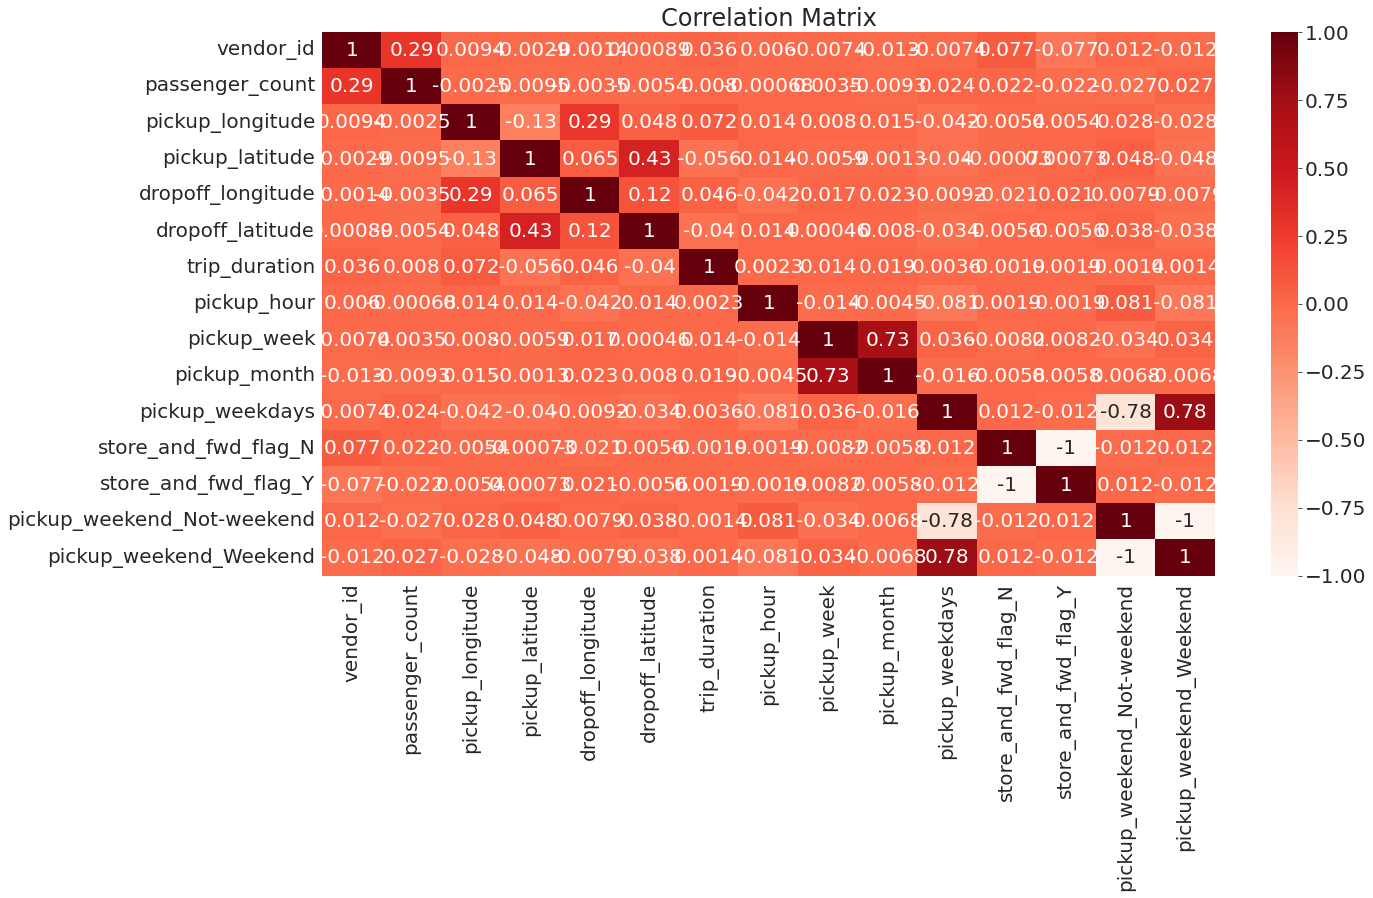

In [80]:
sns.heatmap(train1_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

 Visuvalization of data 

In [81]:
!pip install plotly matplotlib seaborn --quiet

In [82]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

 from the correlation heatmap we understand there are few important rellations we need to study more 
 So, we use the graphs to find them in detail 

The below histogram graph shows the relation between vendor id, passenger count and count

In [83]:
px.histogram(train1_df, x='passenger_count', title='passenger_count vs. vendor_id', color='vendor_id')

The below histogram graph shows the relation between trip duration, passenger count and count

In [84]:
px.histogram(train1_df, x='trip_duration', title='trip_duration vs. passenger count', color='passenger_count')

 pickup and dropoff maps

 Using pickup_longitude and pickup_latitude we locate the pickup locations and map them to find all the pickup locations in newyork
 we also plot the passenger count for more clear understanding to find the busy traffic

In [85]:
px.scatter(train1_df.sample(2000), 
           title='new york pickup location maps with passenger count',
           x='pickup_longitude', 
           y='pickup_latitude', 
           color='passenger_count')

 Using dropoff_longitude and dropoff_latitude we locate the dropoff locations and map them to find all the dropoff locations in newyork 
 we also plot the passenger count for more clear understanding to find the busy traffic

In [86]:
px.scatter(train1_df.sample(2000), 
           title='new york dropoff location maps with passenger count',
           x='dropoff_longitude', 
           y='dropoff_latitude', 
           color='passenger_count')

 new york city map for reference  
I attached this from kaggel
https://www.kaggle.com/maheshdadhich/strength-of-visualization-python-visuals-tutorial

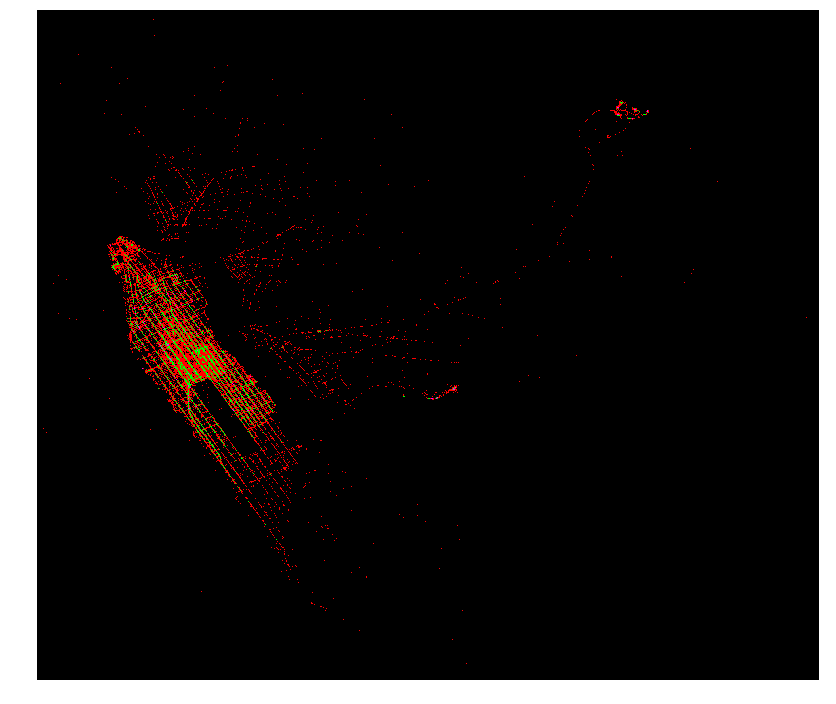

 this scatter graph shows the relation between trip duration, pickup month, passenger count

In [87]:
px.scatter(train1_df.sample(2000), 
           title='trip duration vs pickup month',
           x='pickup_month', 
           y='trip_duration', 
           color='passenger_count')

 The below histogram graph shows the relation between pickup month, passenger count and count

In [88]:
px.histogram(train1_df, x='pickup_month', title='pickup_month vs. passenger count', color='passenger_count')

In [89]:
def estimate_tripduration(pickup_longitude, w, b):
    return pickup_longitude* w + b

In [90]:
pickup_longitude = X_train.pickup_longitude
estimated_tripduration = estimate_tripduration(pickup_longitude, 50, 100)


In [91]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [92]:
def try_parameters(w, b):
    pickup_longitude = X_train.pickup_longitude
    target = train1_targets
    predictions = estimate_tripduration(pickup_longitude, w, b)
    
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [93]:
try_parameters(60, 200)

RMSE Loss:  3243.422518168437


In [94]:
try_parameters(2000, 200)

RMSE Loss:  3156.0643262784993


In [95]:
try_parameters(2000, 10)

RMSE Loss:  3163.5311887222465


 train a linear regression model

In [96]:
from sklearn.linear_model import Ridge

In [97]:
# Create the model
LRmodel = Ridge(alpha=1.0)

In [98]:
# Fit the model using inputs and targets
LRmodel.fit(X_train,train1_targets)


Ridge()

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
train_preds = LRmodel.predict(X_train)

In [101]:
train_preds

array([ 860.6660372 , 1138.00609792,  967.56912019, ..., 1032.58519539,
       1145.52963999,  983.19349344])

In [102]:
train_rmse = mean_squared_error(train1_targets,train_preds,squared=False)

In [103]:
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 3143.171695142517.


In [104]:
val_preds = LRmodel.predict(X_val)

In [105]:
val_preds

array([ 511.25430274,  829.05040314, 1013.50120392, ...,  807.29522145,
        748.48103421, 1058.73569662])

In [106]:
val_rmse = mean_squared_error(val_targets,val_preds,squared=False)

In [107]:
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 6045.903014591887.


In [109]:
LRmodel.coef_

array([  235.50927194,   -34.40245604,  4852.90105443, -2592.60543261,
        3340.29687945, -1991.27213394,    45.86838638,    11.67566383,
         162.59565135,    91.44611504,   -75.96386393,    75.96386393,
          21.30321444,   -21.30321444])

In [110]:
LRmodel.intercept_

-1056.3240806853914

 LinearRegression model

Linear Regression using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like `scikit-learn` to do this for you. 

In [111]:
!pip install scikit-learn --quiet

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [114]:
# Create inputs and targets
inputs_train, targets_train = X_train[['pickup_longitude', 'dropoff_longitude','pickup_latitude','dropoff_latitude','vendor_id','pickup_month','pickup_weekdays']], train1_targets
inputs_val, targets_val = X_val[['pickup_longitude', 'dropoff_longitude','pickup_latitude','dropoff_latitude','vendor_id','pickup_month','pickup_weekdays']], val_targets
inputs_test, targets_test = X_test[['pickup_longitude', 'dropoff_longitude','pickup_latitude','dropoff_latitude','vendor_id','pickup_month','pickup_weekdays']], test_targets

In [115]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions)
print('Loss:', loss)


Loss: 3143.2500798167175


In [116]:
# Generate predictions
predictions = model.predict(inputs_val)

# Compute loss to evalute the model
loss = rmse(targets_val, predictions)
print('Loss:', loss)

Loss: 6046.2271628604485


In [117]:
# Generate predictions
predictions = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions)
print('Loss:', loss)

Loss: 3007.445233939244


In [118]:
 jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dvinay-19-cse/project


'https://jovian.ai/dvinay-19-cse/project'

decision tree model

 I have used my past assignment experience of decision trees and random forests to build this model

link : https://jovian.ai/dvinay-19-cse/python-random-forests-assignment

The Decision Tree max depth has been changed alot of times but there is no difference in the output when deapth incresed after 10
so fixed the value of max depth to 10

In [119]:
from sklearn.tree import DecisionTreeRegressor

In [120]:
Dtmodel = DecisionTreeRegressor(random_state=42,max_depth= 10,min_samples_leaf=6)

In [121]:
Dtmodel.fit(X_train, targets_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=6, random_state=42)

In [122]:
from sklearn.metrics import mean_squared_error

In [123]:
train_preds= Dtmodel.predict(X_train)

In [124]:
train_preds

array([ 822.77304965, 1175.7258427 ,  766.87868769, ...,  766.87868769,
        467.59968928,  467.59968928])

In [125]:
tree_train_rmse = mean_squared_error(targets_train,train_preds,squared=False)

In [126]:
tree_train_rmse

2962.458018699928

In [127]:
Dtmodel = DecisionTreeRegressor(random_state=42,max_depth= 10,min_samples_leaf=6)
Dtmodel.fit(X_val, targets_val)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=6, random_state=42)

In [128]:
val_preds= Dtmodel.predict(X_val)
tree_val_rmse = mean_squared_error(targets_val,val_preds,squared=False)
tree_val_rmse

5744.861502482992

Visuvalization Of the decision tree and features 

In [129]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

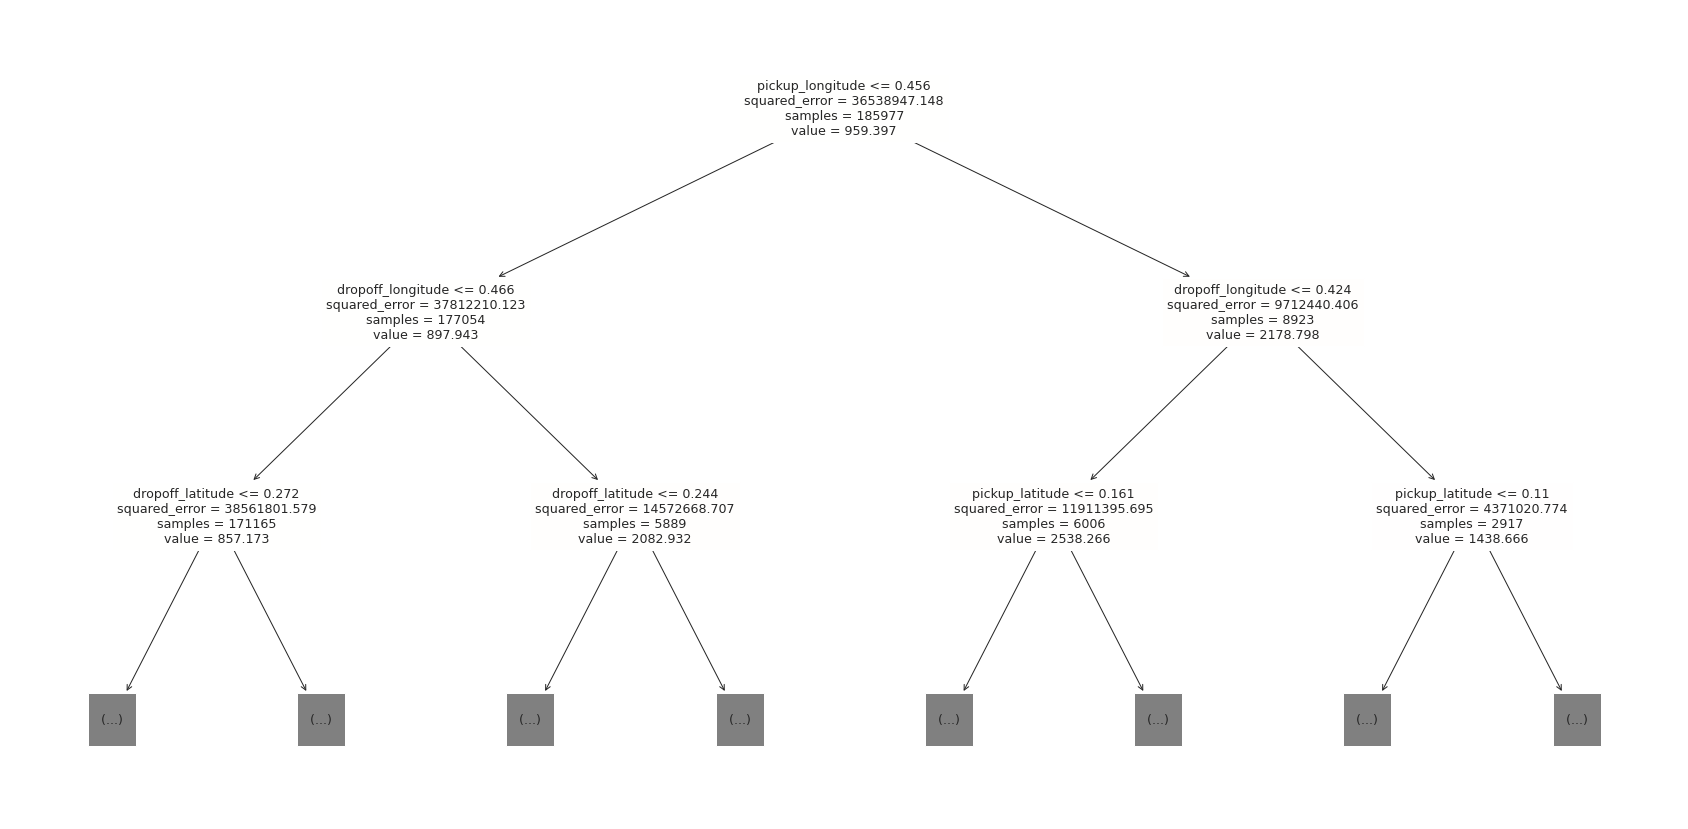

In [130]:
plt.figure(figsize=(30,15))

plot_tree(Dtmodel, feature_names=X_train.columns, max_depth=2, filled=True);

In [131]:
tree_text = export_text(Dtmodel, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- pickup_longitude <= 0.46
|   |--- dropoff_longitude <= 0.47
|   |   |--- dropoff_latitude <= 0.27
|   |   |   |--- pickup_latitude <= 0.26
|   |   |   |   |--- dropoff_latitude <= 0.22
|   |   |   |   |   |--- pickup_latitude <= 0.19
|   |   |   |   |   |   |--- dropoff_longitude <= 0.43
|   |   |   |   |   |   |   |--- dropoff_latitude <= 0.15
|   |   |   |   |   |   |   |   |--- pickup_latitude <= 0.14
|   |   |   |   |   |   |   |   |   |--- pickup_latitude <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- value: [465.96]
|   |   |   |   |   |   |   |   |   |--- pickup_latitude >  0.10
|   |   |   |   |   |   |   |   |   |   |--- value: [848.36]
|   |   |   |   |   |   |   |   |--- pickup_latitude >  0.14
|   |   |   |   |   |   |   |   |   |--- dropoff_latitude <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [1918.88]
|   |   |   |   |   |   |   |   |   |--- dropoff_latitude >  0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [1116.78]
|   |   |   |   | 

In [132]:
# Check feature importance
tree_importances = Dtmodel.feature_importances_

In [133]:
tree_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [134]:
tree_importance_df

,feature,importance
3,pickup_latitude,0.874012
4,dropoff_longitude,0.038811
5,dropoff_latitude,0.033294
2,pickup_longitude,0.031516
6,pickup_hour,0.006741
12,pickup_weekend_Not-weekend,0.003970
7,pickup_week,0.003366
0,vendor_id,0.002749
1,passenger_count,0.002003
8,pickup_month,0.001846


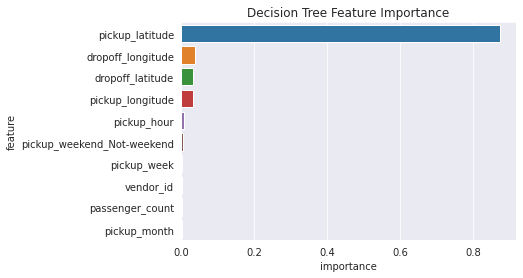

In [135]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

In [136]:
targets_train.describe()

count    32819.000000
mean       951.450257
std       3160.462442
min          1.000000
25%        398.000000
50%        662.000000
75%       1075.500000
max      86354.000000
Name: trip_duration, dtype: float64

In [137]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
fig = px.histogram(targets_train, 
                   x='trip_duration', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Trip Duration')
fig.update_layout(bargap=0.1)
fig.show()

In [139]:
fig = px.histogram(targets_train, 
                   x='trip_duration', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of Trip Duration')
fig.update_layout(bargap=0.1)
fig.show()

final parameters of decision tree

In [140]:
DTmodel = DecisionTreeRegressor(random_state=42,max_depth= 10,min_samples_leaf=6,max_leaf_nodes=60)

In [141]:
DTmodel.fit(X_train, targets_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=60, min_samples_leaf=6,
                      random_state=42)

In [142]:
DTmodel.fit(X_test, targets_test)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=60, min_samples_leaf=6,
                      random_state=42)

In [143]:
train_preds= DTmodel.predict(X_train)

In [144]:
test_preds= DTmodel.predict(X_test)

In [145]:
train_preds , test_preds

(array([527.1779661 , 834.12201745, 834.12201745, ..., 834.12201745,
        834.12201745, 834.12201745]),
 array([ 834.12201745,  834.12201745, 1516.50987261, ...,  679.99448855,
         834.12201745,  834.12201745]))

In [146]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dvinay-19-cse/project


'https://jovian.ai/dvinay-19-cse/project'

In [147]:
tree_train_rmse = mean_squared_error(targets_train,train_preds,squared=False)
tree_test_rmse = mean_squared_error(targets_test,test_preds,squared=False)

In [148]:
tree_train_rmse , tree_test_rmse

(3151.2504788436136, 2957.9590461750863)

Random Forest Regressor 

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [151]:
# Fit the model
rf1.fit(X_train, targets_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [152]:
rf1_train_preds = rf1.predict(X_train)

In [153]:
rf1_train_rmse = mean_squared_error(targets_train,rf1_train_preds,squared=False)

In [154]:
rf1_train_rmse

1206.7956882459116

In [155]:
rf1.fit(X_val, targets_val)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [156]:
rf1_val_preds = rf1.predict(X_val)
rf1_val_rmse = mean_squared_error(targets_val,rf1_val_preds,squared=False)

In [157]:
rf1_val_rmse

2825.38926681088

In [158]:
default =(rf1_train_rmse,rf1_val_rmse)

# lets define a function for the randomforest

In [159]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, targets_train)
    train_rmse = mean_squared_error(model.predict(X_train), targets_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), targets_val, squared=False)
    return train_rmse,val_rmse

after many n_estimators and max_depth trails the values are like this way here are few results

n_estimators =30 and max_depth =10, train rmse = 2213.6632947283256 ,val rmse = 6091.406598085774

n_estimators =30 and max_depth =20, train rmse = 2758.5840377603 ,val rmse = 6030.339828509905

n_estimators =100 and max_depth =20, train rmse = 2754.3253566531343 ,val rmse = 6025.468829669705


In [160]:
test_params(n_estimators=30, max_depth=10)

(2213.6632947283256, 6091.406598085774)

In [161]:
test_params(n_estimators=30, max_depth=20, min_samples_leaf=6, max_features=0.4)

(2758.5840377603, 6030.339828509905)

In [162]:
test_params(n_estimators=100, max_depth=20, min_samples_leaf=6, max_features=0.4)

(2754.3253566531343, 6025.468829669705)

lets fix n_estimators to 30 and max_depth to 20
# lets find max leaf nodes

after many max_leaf_nodes here are few results

max_leaf_nodes = 2**5 ,train rmse = 2452.5555403731946, val rmse =6072.58653847303

max_leaf_nodes = 2**10 ,train rmse = 1224.041887370889, val rmse =6111.229895642871

max_leaf_nodes = 2**20 ,train rmse = 1205.0679181011099, val rmse =6110.772094938149

In [163]:
test_params(max_leaf_nodes=2**5)

(2452.5555403731946, 6072.58653847303)

In [164]:
test_params(max_leaf_nodes=2**10)

(1224.041887370889, 6111.229895642871)

In [165]:
test_params(max_leaf_nodes=2**20)

(1205.0679181011099, 6110.772094938149)

The max_leaf_nodes is fixed to 2**10
# lets find meax_features

after many trails of max_feautures here are some results

max_features =log2, train rmse=1158.0041213112308 ,val rmse = 6040.66836409528

max_features =3, train rmse= 1158.0041213112308 ,val rmse = 6040.66936407528

max_features =6, train rmse= 1165.381198568425 ,val rmse = 6048.539398483565

max_features =1, train rmse= 1158.005135471403 ,val rmse = 6040.871578384516

max_features =0.4, train rmse= 1159.150175114739  ,val rmse =6045.0139731384415

In [166]:
test_params(max_features='log2')

(1158.0041213112308, 6040.66836409528)

In [167]:
test_params(max_features=3)

(1158.0041213112308, 6040.66836409528)

In [168]:
test_params(max_features=6)

(1165.381198568425, 6048.539398483565)

In [169]:
test_params(max_features=1)

(1158.005135471403, 6040.871578384516)

In [170]:
test_params(max_features=0.4)

(1159.150175114739, 6045.0139731384415)

after these trends lets lock the value of max_features to log2
# lets find min sample split and min samples leaf

after many min_samples_split and min_samples_leaf here are few results

min_samples_split=3 ,min_samples_leaf=2
train rmse =2131.1637930544507 ,val rmse =6071.692312253991

min_samples_split=100 ,min_samples_leaf=60
train rmse =3057.2171333639594 ,val rmse =6023.088322926534

In [171]:
test_params(min_samples_split=3, min_samples_leaf=2)

(2131.1637930544507, 6071.692312253991)

In [172]:
test_params(min_samples_split=100, min_samples_leaf=60)

(3057.2171333639594, 6023.088322926534)

In [173]:
default

(1206.7956882459116, 2825.38926681088)

Its better to leave min_sample_split by default and min_sample_leaf to 6
# lets find min impurity decrease

after some min_impuity_decrease here are few results
min_impurity_decrease=1e-7 ,train rmse= 1206.7956882459116 ,val rmse= 6110.473967156

min_impurity_decrease=1e-2 ,train rmse= 1205.9244803499032 ,val rmse= 6110.611477669048

In [174]:
test_params(min_impurity_decrease=1e-7)

(1206.7956882459116, 6110.473967156)

In [175]:
test_params(min_impurity_decrease=1e-2)

(1205.924480349903, 6110.911477669048)

lets fix min_impurity_decrease = 1e-2
# lets find bootstrap

after some trails of bootstrap here are few results

bootstrap= False ,train rmse =0.0,val rmse =6676.413618638065

bootstrap= True ,train rmse =1206.7956882459116,val rmse =6110.473967156

In [176]:
test_params(bootstrap=False)

(0.0, 6676.413618638065)

In [177]:
test_params(bootstrap=True)

(1206.7956882459116, 6110.473967156)

In [178]:
default

(1206.7956882459116, 2825.38926681088)

Lets leave the bootstrap value to True

# lets find max_samples

after many trails in max_samples here are few results

max_samples=0.3 ,train_ramse =2373.4535278184553, val_rmse =6049.661330136405

max_samples=0.6 ,train_ramse =1767.9184597150042, val_rmse =6074.034432743583

max_samples=0.9 ,train_ramse =1327.9241242195076, val_rmse =6100.977970170113

In [179]:
test_params(max_samples=0.3)

(2373.4535278184553, 6049.661330136405)

In [180]:
test_params(max_samples=0.6)

(1767.9184597150042, 6074.034432743583)

In [181]:
test_params(max_samples=0.9)

(1327.9241242195076, 6100.977970170113)

lets fix max_samples = 0.6 
# lets build the final model

In [182]:
RFmodel = RandomForestRegressor(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=30,
                               max_features='log2',
                               max_depth=20,
                               max_samples=0.6,
                               min_impurity_decrease = 1e-2,
                               max_leaf_nodes=2**10,
                               min_samples_leaf=6,
                               bootstrap=True)

In [183]:
RFmodel.fit(X_train, targets_train)

RandomForestRegressor(max_depth=20, max_features='log2', max_leaf_nodes=1024,
                      max_samples=0.6, min_impurity_decrease=0.01,
                      min_samples_leaf=6, n_estimators=30, n_jobs=-1,
                      random_state=42)

In [184]:
RFmodel_train_preds = RFmodel.predict(X_train)

In [185]:
RFmodel_train_rmse = mean_squared_error(targets_train,RFmodel_train_preds,squared=False)

In [186]:
RFmodel_train_rmse

2879.988839637557

In [187]:
RFmodel.fit(X_val, val_targets)
RFmodel_val_preds = RFmodel.predict(X_val)
RFmodel_val_rmse = mean_squared_error(val_targets,RFmodel_val_preds,squared=False)
RFmodel_val_rmse

5790.074489833416

In [188]:
result=(RFmodel_train_rmse,RFmodel_val_rmse)
result

(2879.988839637557, 5790.074489833416)

In [189]:
default

(1206.7956882459116, 2825.38926681088)

lets end the model of regression

# lets try xgbooster 

In [190]:
from xgboost import XGBRegressor

In [191]:
?XGBRegressor

In [192]:
Xgmodel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=30, max_depth=20)

In [193]:
%%time
Xgmodel.fit(X_train, targets_train)

[04:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 6.54 s, sys: 44.8 ms, total: 6.59 s
Wall time: 3.48 s


XGBRegressor(max_depth=20, n_estimators=30, n_jobs=-1, random_state=42)

In [194]:
preds = Xgmodel.predict(X_train)

In [195]:
preds

array([ 474.36795, 1283.409  ,  489.36514, ...,  573.4589 ,  469.28656,
        332.61237], dtype=float32)

In [196]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [197]:
rmse(preds, targets_train)

689.7826562438624

# visuvalize the data with xgbooster

In [198]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.647122 to fit


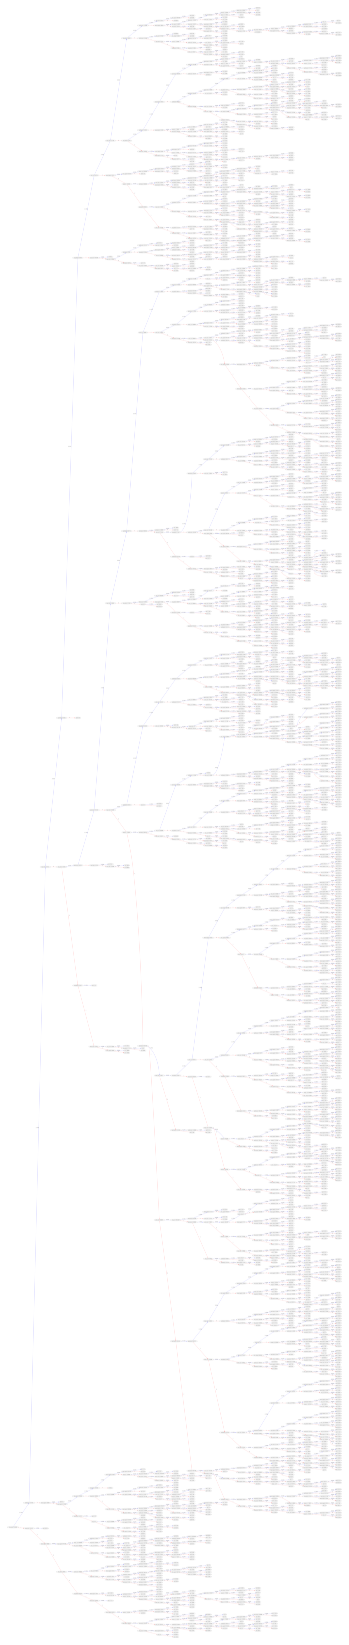

In [199]:
plot_tree(Xgmodel,rankdir='LR');

# feature importance

In [200]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': Xgmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [201]:
importance_df.head(10)

,feature,importance
0,vendor_id,0.315721
4,dropoff_longitude,0.173982
3,pickup_latitude,0.173278
1,passenger_count,0.098765
5,dropoff_latitude,0.089443
2,pickup_longitude,0.084089
9,pickup_weekdays,0.022444
7,pickup_week,0.020969
6,pickup_hour,0.019094
8,pickup_month,0.001686


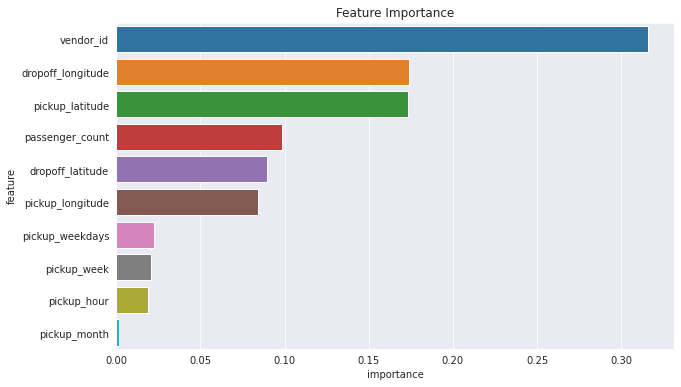

In [202]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [203]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dvinay-19-cse/project


'https://jovian.ai/dvinay-19-cse/project'

In [204]:
def test_params1(**params):
    Xgmodel = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, targets_train)
    train_rmse = mean_squared_error(Xgmodel.predict(X_train), targets_train,squared=False)
    val_rmse = mean_squared_error(Xgmodel.predict(X_val),targets_val,squared=False)
    return train_rmse,val_rmse

# n estimators

In [205]:
test_params1(n_estimators=10)

[04:28:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3102.412277711898, 6045.293783736092)

In [206]:
test_params1(n_estimators=30)

[04:28:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3004.9548910667854, 6034.8803468333745)

In [207]:
test_params1(n_estimators=100)

[04:28:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2829.87586722923, 6043.282989721254)

In [208]:
test_params1(n_estimators=240)

[04:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2439.045080825003, 6073.810453036061)

lets fix n estimators to 100

#### `max_depth`

# As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [209]:
test_params1(max_depth=2)

[04:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3031.151674141581, 6033.17585812192)

In [210]:
test_params1(max_depth=5)

[04:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2191.240406858485, 6067.444169593098)

In [211]:
test_params1(max_depth=10)

[04:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(572.1023414432818, 6204.523805410086)

In [212]:
test_params1(max_depth=20)

[04:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(25.6427501935149, 6301.079614045536)

lets lock the max_depth to 5
### #### `learning_rate`

# The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [213]:
test_params1(n_estimators=30, learning_rate=0.01)

[04:29:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3209.2058256846235, 6081.664109330458)

In [214]:
test_params1(n_estimators=30, learning_rate=0.1)

[04:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3004.9548910667854, 6034.8803468333745)

In [215]:
test_params1(n_estimators=30, learning_rate=0.3)

[04:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2859.365713184868, 6039.635506367746)

In [216]:
test_params1(n_estimators=30, learning_rate=0.6)

[04:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2603.7882336798857, 6072.911533497131)

In [217]:
test_params1(n_estimators=30, learning_rate=0.9)

[04:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2423.1575032983133, 6123.528336933853)

lets fix the learning rate to 0.6
#### `booster`

# Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [218]:
test_params1(booster='gblinear')

[04:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3159.317336833455, 6044.34719948123)

## lets fix the booster to gblinear

# lets see further about subsample

In [219]:
test_params1(subsample=0.1)

[04:29:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3013.561444401813, 6090.51588290402)

In [220]:
test_params1(subsample=0.3)

[04:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2877.8443549313756, 6047.954893879071)

In [221]:
test_params1(subsample=0.6)

[04:29:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2823.7098319816846, 6037.999362797059)

In [222]:
test_params1(subsample=0.9)

[04:29:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2835.3815228523586, 6035.626750503148)

# lets fix the subsampple value to 0.6

# lets see about colsample_bytree 

In [223]:
test_params1(colsample_bytree=0.1)

[04:29:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3019.474846784891, 6040.215596186471)

In [224]:
test_params1(colsample_bytree=0.3)

[04:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2904.7387056529537, 6042.087893712155)

In [225]:
test_params1(colsample_bytree=0.6)

[04:29:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2876.45507742744, 6036.912267099395)

In [226]:
test_params1(colsample_bytree=0.9)

[04:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(2830.6513399463934, 6041.115877867911)

## lets fix the value of colsample bytree to 0.6
# lets grab them together to form a final model

In [227]:
XGmodel = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=100, 
                     learning_rate=0.6, max_depth=5, subsample=0.6, 
                     colsample_bytree=0.6,booster='gblinear')

In [228]:
%%time
XGmodel.fit(X_train, train1_targets)
XGmodel.fit(X_val, val_targets)

[04:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 8.02 s, sys: 16 ms, total: 8.03 s
Wall time: 4.16 s


In [229]:
train_preds = XGmodel.predict(X_train)
val_preds = XGmodel.predict(X_val)

In [230]:
train_preds,val_preds

(array([929.5231 , 985.1534 , 977.1042 , ..., 980.716  , 981.95953,
        986.601  ], dtype=float32),
 array([922.3983 , 946.51917, 988.6117 , ..., 977.503  , 938.1618 ,
        984.7863 ], dtype=float32))

In [231]:
train_rmse = mean_squared_error(train_preds,train1_targets,squared=False)

val_rmse = mean_squared_error(val_preds,val_targets,squared=False)
train_rmse , val_rmse

(3159.6796474639755, 6044.382818664389)

In [232]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dvinay-19-cse/project


'https://jovian.ai/dvinay-19-cse/project'

# now at the end lets find which model works good

# final linear Regressor model

In [233]:
LRmodel = Ridge(alpha=1.0)
# Create and train the model
LRmodel.fit(X_test, targets_test)
# Generate predictions
LRmodel_test_preds = LRmodel.predict(X_test)

LRmodel_test_rmse = mean_squared_error(targets_test,LRmodel_test_preds,squared=False)
LRmodel_test_rmse

3005.530650545333

# final Decision Tree model

In [234]:
DTmodel1 = DecisionTreeRegressor(random_state=42,max_depth= 10,min_samples_leaf=6,max_leaf_nodes=60)
DTmodel1.fit(X_test, targets_test)



DecisionTreeRegressor(max_depth=10, max_leaf_nodes=60, min_samples_leaf=6,
                      random_state=42)

In [235]:
DTmodel1_test_preds= DTmodel.predict(X_test)

In [236]:
DTmodel1_test_rmse = mean_squared_error(targets_test,DTmodel1_test_preds,squared=False)
DTmodel1_test_rmse

2957.9590461750863

# final Random Forest model

In [237]:
RFmodel = RandomForestRegressor(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=30,
                               max_features='log2',
                               max_depth=20,
                               max_samples=0.6,
                               min_impurity_decrease = 1e-2,
                               max_leaf_nodes=2**10,
                               min_samples_leaf=6,
                               bootstrap=True)
RFmodel.fit(X_test, targets_test)

RandomForestRegressor(max_depth=20, max_features='log2', max_leaf_nodes=1024,
                      max_samples=0.6, min_impurity_decrease=0.01,
                      min_samples_leaf=6, n_estimators=30, n_jobs=-1,
                      random_state=42)

In [238]:
RFmodel_test_preds = RFmodel.predict(X_test)
RFmodel_test_rmse = mean_squared_error(targets_test,RFmodel_test_preds,squared=False)
RFmodel_test_rmse

2787.148005440751

# final XGBoost model

In [239]:
XGmodel = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=100, 
                     learning_rate=0.6, max_depth=5, subsample=0.6, 
                     colsample_bytree=0.6,booster='gblinear')
XGmodel.fit(X_test, targets_test)

[04:29:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(booster='gblinear', colsample_bytree=0.6, learning_rate=0.6,
             max_depth=5, n_jobs=-1, random_state=42, subsample=0.6)

In [240]:
XGmodel_test_preds = XGmodel.predict(X_test)
XGmodel_test_rmse = mean_squared_error(targets_test,XGmodel_test_preds,squared=False)
XGmodel_test_rmse

3018.661141079115

In [241]:
LRmodel_test_rmse,DTmodel1_test_rmse,RFmodel_test_rmse,XGmodel_test_rmse

(3005.530650545333, 2957.9590461750863, 2787.148005440751, 3018.661141079115)

# after all testing all the models 

# "RANDOM FOREST REGRESSOR IS BEST MODEL FOR THIS PROBLEM" 

In [242]:
 jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dvinay-19-cse/project


'https://jovian.ai/dvinay-19-cse/project'